### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import math

### Load data

In [2]:
path = '/Users/jooyong/github_locals/Soccer_Player_Recommendation_Service/data/match_details(from_Transfermarket)/Laliga_match_details/'
file_list = os.listdir(path)

Premier_matches = pd.DataFrame()
for file in file_list:

    filepath = path + file
    Premier_matches = pd.concat([Premier_matches, pd.read_json(filepath, lines=True)], axis=0)

In [3]:
Premier_matches.tail(5)

,match_general_info,team_details,event_details
370,"{'day': 'Sat', 'date': '5/21/11', 'starttime':...","{'home': {'name': 'Málaga CF', 'rank': '11', '...",{'home': {'goal': [{'scorer': 'Sebastián Ferná...
371,"{'day': 'Sat', 'date': '5/21/11', 'starttime':...","{'home': {'name': 'Real Madrid', 'rank': '2', ...",{'home': {'goal': [{'scorer': 'Cristiano Ronal...
372,"{'day': 'Sat', 'date': '5/21/11', 'starttime':...","{'home': {'name': 'Hércules CF', 'rank': '19',...","{'home': {'card': [{'name': 'Abel Aguilar', 'c..."
373,"{'day': 'Sat', 'date': '5/21/11', 'starttime':...","{'home': {'name': 'CA Osasuna', 'rank': '9', '...","{'home': {'goal': [{'scorer': 'Álvaro Cejudo',..."
374,"{'day': 'Sat', 'date': '5/21/11', 'starttime':...","{'home': {'name': 'Real Sociedad', 'rank': '15...","{'home': {'goal': [{'scorer': 'Paco Sutil', 'g..."


In [4]:
print('number of matches from season 2010/2011 to the date the data scraped:', len(Premier_matches))

number of matches from season 2010/2011 to the date the data scraped: 5005


### Match general information analysis
#### Observe initial form

In [5]:
match_general_info = pd.DataFrame(Premier_matches['match_general_info'].to_list())

In [6]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score
0,Fri,12/11/20,9:00 PM,Nuevo José Zorrilla,None,Adrián Cordero Vega,3:2
1,Sat,12/12/20,2:00 PM,Mestalla,None,Carlos del Cerro Grande,2:2
2,Sat,12/12/20,4:15 PM,Coliseum Alfonso Pérez,None,Juan Martínez Munuera,0:1
3,Sat,12/12/20,6:30 PM,El Alcoraz,None,Mario Melero López,1:0
4,Sat,12/12/20,9:00 PM,Estadio Alfredo Di Stéfano,None,Mateu Lahoz,2:0


In [7]:
for column in match_general_info.columns:

    print(column, match_general_info[column].isnull().sum())


day 0
date 0
starttime 1
stadium 0
attendance 501
referee 4
score 0


In [77]:
# fillout start time and feree using max value of each feature respectively.
match_general_info['starttime'] = match_general_info['starttime'].fillna(match_general_info['starttime'].mode()[0])
match_general_info['referee'] = match_general_info['referee'].fillna(match_general_info['referee'].mode()[0])

Attendance data need to be observed after converting string-type date to date-type date to check why many null values exist.

#### Data pre-processing

In [8]:
def home_score(row):
    try:
        temp = row.split(':')
        home = int(temp[0])
    except:
        home = row
    return home
def away_score(row):
    try:
        temp = row.split(':')
        away = int(temp[1])
    except:
        away = row
    return away

match_general_info['home_score'] = match_general_info['score'].apply(lambda x: home_score(x))
match_general_info['away_score'] = match_general_info['score'].apply(lambda x: away_score(x))

match_general_info['date'] = pd.to_datetime(match_general_info['date'])
match_general_info['starttime'] = pd.to_datetime(match_general_info['starttime']).apply(lambda x: datetime.time(x))

In [9]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
0,Fri,2020-12-11,21:00:00,Nuevo José Zorrilla,None,Adrián Cordero Vega,3:2,3,2
1,Sat,2020-12-12,14:00:00,Mestalla,None,Carlos del Cerro Grande,2:2,2,2
2,Sat,2020-12-12,16:15:00,Coliseum Alfonso Pérez,None,Juan Martínez Munuera,0:1,0,1
3,Sat,2020-12-12,18:30:00,El Alcoraz,None,Mario Melero López,1:0,1,0
4,Sat,2020-12-12,21:00:00,Estadio Alfredo Di Stéfano,None,Mateu Lahoz,2:0,2,0


In [10]:
# cases having null value for attendance
match_general_info[match_general_info['attendance'].isnull()]

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
0,Fri,2020-12-11,21:00:00,Nuevo José Zorrilla,None,Adrián Cordero Vega,3:2,3,2
1,Sat,2020-12-12,14:00:00,Mestalla,None,Carlos del Cerro Grande,2:2,2,2
2,Sat,2020-12-12,16:15:00,Coliseum Alfonso Pérez,None,Juan Martínez Munuera,0:1,0,1
3,Sat,2020-12-12,18:30:00,El Alcoraz,None,Mario Melero López,1:0,1,0
4,Sat,2020-12-12,21:00:00,Estadio Alfredo Di Stéfano,None,Mateu Lahoz,2:0,2,0
...,...,...,...,...,...,...,...,...,...
4377,Wed,2021-04-21,21:00:00,Manuel Martínez Valero,None,José María Sánchez Martínez,1:1,1,1
4378,Wed,2021-04-21,22:00:00,Nuevo Mirandilla,None,Mateu Lahoz,0:3,0,3
4379,Thu,2021-04-22,19:00:00,Civitas Metropolitano,None,José Luis Munuera Montero,2:0,2,0
4611,Sat,2023-05-20,16:15:00,San Mamés,None,Mario Melero López,2:1,2,1


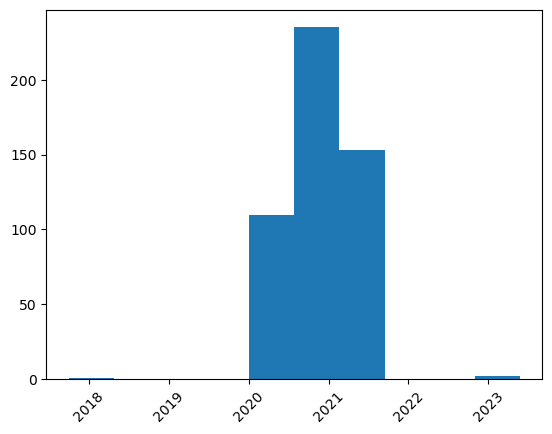

In [11]:
plt.hist(match_general_info[match_general_info['attendance'].isnull()]['date'])
plt.xticks(rotation = 45)
plt.show()

Most null cases for attendance were located in the season 2020-2021, possibly because of the pandemic. <br>
There were many games without game spectators during the pandemic(between 05.01.2020 and 07.01.2021), so 0 will replace null values for attendance. <br>

For other cases, the average attendance for the stadium will replace null values.

In [12]:
match_general_info.loc[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01'), 'attendance'] = \
    match_general_info[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01')]['attendance'].fillna('0')

print('Date and stadium of a game with null attendance. (Not pandemic season)')
match_general_info[match_general_info['attendance'].isnull()][['date', 'stadium']]

Date and stadium of a game with null attendance. (Not pandemic season)


,date,stadium
2485,2017-10-01,Spotify Camp Nou
4611,2023-05-20,San Mamés
4627,2023-05-25,Mallorca Son Moix


In [13]:
# save indices for missing attendance samples to later check
attendance_missing_index = match_general_info[match_general_info['attendance'].isnull()].index

for stadium in set(match_general_info[match_general_info['attendance'].isnull()]['stadium']):

    average = pd.to_numeric(match_general_info[match_general_info['stadium']==stadium]['attendance'].dropna().apply(lambda x: x.replace('.', ''))).mean()
    if math.isnan(average)!=True:
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(round(average)))
    
    else:
        print('cannot find an average, missing value filled out manually:', stadium)
        # max capacity of Kenilworth Road stadium is 11500, so I am going to use 10000.(because nothing left after drop null value)
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(10000)) 

match_general_info['attendance'] = pd.to_numeric(match_general_info['attendance'].apply(lambda x: x.replace('.', ''))).apply(lambda x: round(x))

In [14]:
# to check missing attendances are filled out or not
for one_index in attendance_missing_index:
    print(match_general_info.loc[one_index]['date'].date(), match_general_info.loc[one_index]['attendance'])

2017-10-01 66998
2023-05-20 34519
2023-05-25 13528


As we can see above, missing attendance of matches after 07.01.2021 (no pandemic period) were filled with averages.

In [78]:
for column in match_general_info.columns:
    print(column, match_general_info[column].isnull().sum())

day 0
date 0
starttime 0
stadium 0
attendance 0
referee 0
score 0
home_score 0
away_score 0


Now, we don't have null values anymore.

#### Data Quality Check - Check if there are inappropriate values
##### categorical data

In [16]:
match_general_info.describe(include=['object'])

,day,starttime,stadium,referee,score
count,5005,5005,5005,5001,5005
unique,7,33,41,55,55
top,Sun,21:00:00,Ramón Sánchez-Pizjuán,Mateu Lahoz,1:1
freq,2009,820,251,253,565


In [17]:
match_general_info.describe(include=['datetime'], datetime_is_numeric=True)

,date
count,5005
mean,2017-02-06 19:47:57.842157824
min,2010-08-28 00:00:00
25%,2013-10-31 00:00:00
50%,2017-02-17 00:00:00
75%,2020-07-02 00:00:00
max,2023-09-03 00:00:00


In [18]:
match_general_info['day'].value_counts(dropna=False)

Sun    2009
Sat    1762
Mon     345
Fri     337
Wed     259
Thu     150
Tue     143
Name: day, dtype: int64

In [19]:
match_general_info['date'].value_counts(dropna=False)

2011-05-21    15
2021-04-21    12
2011-05-15    10
2023-06-04    10
2012-05-05    10
              ..
2021-09-27     1
2021-10-01     1
2013-02-11     1
2014-10-17     1
2016-01-04     1
Name: date, Length: 1659, dtype: int64

In [20]:
match_general_info['starttime'].value_counts(dropna=False)

21:00:00    820
18:30:00    496
22:00:00    412
20:00:00    373
16:15:00    356
20:45:00    283
12:00:00    278
18:00:00    274
16:00:00    270
19:00:00    241
17:00:00    240
14:00:00    203
20:30:00    140
21:30:00    130
19:30:00    130
13:00:00    115
18:15:00     94
22:05:00     29
19:45:00     19
22:15:00     18
20:15:00     18
23:00:00     16
17:30:00     13
22:30:00      7
19:50:00      7
19:15:00      6
17:50:00      4
21:15:00      4
18:45:00      3
16:45:00      3
16:30:00      1
21:45:00      1
00:00:00      1
Name: starttime, dtype: int64

In [21]:
match_general_info['stadium'].value_counts(dropna=False)

Ramón Sánchez-Pizjuán                251
Mestalla                             250
San Mamés                            249
Spotify Camp Nou                     248
Coliseum Alfonso Pérez               231
La Cerámica                          229
RCDE Stadium                         229
Santiago Bernabéu                    224
Abanca Balaídos                      211
Ciutat de València                   208
El Sadar                             175
Nuevo Los Cármenes                   173
Anoeta                               173
Benito Villamarín                    156
Campo de Fútbol de Vallecas          154
La Rosaleda                          153
Vicente Calderón                     133
Ipurua                               132
Mallorca Son Moix                    117
Mendizorroza                         117
Nuevo José Zorrilla                  115
Civitas Metropolitano                115
Abanca Riazor                        114
Manuel Martínez Valero                97
Reale Arena     

In [22]:
match_general_info['referee'].value_counts(dropna=False)

Mateu Lahoz                       253
Carlos del Cerro Grande           238
Estrada Fernández                 219
Jesús Gil Manzano                 217
González González                 202
Alejandro Hernández Hernández     201
Juan Martínez Munuera             183
Undiano Mallenco                  178
Iglesias Villanueva               175
José María Sánchez Martínez       164
Mario Melero López                161
De Burgos Bengoetxea              159
Álvarez Izquierdo                 151
Santiago Jaime Latre              150
Carlos Clos Gómez                 146
David Fernández Borbalán          143
José Luis Munuera Montero         136
Pablo González Fuertes            121
Javier Alberola Rojas             116
Carlos Velasco Carballo           110
Fernando Teixeira Vitienes        100
Eduardo Prieto Iglesias            96
José Antonio Teixeira Vitienes     96
Guillermo Cuadra Fernández         94
Pedro Jesús Pérez Montero          89
César Soto Grado                   84
César Muñiz 

##### numerical data


In [23]:
match_general_info.describe()

,attendance,home_score,away_score
count,5005.000000,5005.000000,5005.000000
mean,24817.906294,1.545854,1.125475
std,19670.515497,1.338324,1.137895
min,0.000000,0.000000,0.000000
25%,12100.000000,1.000000,0.000000
50%,19270.000000,1.000000,1.000000
75%,34711.000000,2.000000,2.000000
max,99354.000000,10.000000,8.000000


### Home/Away Team Details Analysis

#### Data pre-processing

In [24]:
team_details = pd.DataFrame(Premier_matches['team_details'].to_list())
home_team_details = pd.DataFrame(team_details['home'].to_list())
away_team_details = pd.DataFrame(team_details['away'].to_list())

In [25]:
home_team_details.head()

,name,rank,starting_line_up,substitutes,manager
0,Real Valladolid CF,16,"[Jordi Masip, Joaquín Fernández, Bruno Gonzále...","[Roberto, Javi Sánchez, Jawad El Yamiq, Raúl C...",Sergio
1,Valencia CF,14,"[Jaume Doménech, Gabriel Paulista, Mouctar Dia...","[Cristian Rivero, Eliaquim Mangala, Thierry Co...",Javi Gracia
2,Getafe CF,17,"[David Soria, Erick Cabaco, Xabi Etxeita, Math...","[Rubén Yáñez, Ryan Nolan, Damián Suárez, Ante ...",Pepe Bordalás
3,SD Huesca,19,"[Álvaro Fernández, Dimitrios Siovas, Jorge Pul...","[Andrés Fernández, Gastón Silva, Pablo Insua, ...",Míchel
4,Real Madrid,3,"[Thibaut Courtois, Sergio Ramos, Raphaël Varan...","[Andriy Lunin, Diego Altube, Éder Militão, Nac...",Zinédine Zidane


In [26]:
away_team_details.head()

,name,rank,starting_line_up,substitutes,manager
0,CA Osasuna,20,"[Sergio Herrera, David García, Aridane Hernánd...","[Iñaki Álvarez, Rubén Martínez, Unai García, F...",Jagoba Arrasate
1,Athletic Bilbao,15,"[Unai Simón, Iñigo Martínez, Yeray Álvarez, Yu...","[Jokin Ezkieta, Unai Núñez, Mikel Balenziaga, ...",Gaizka Garitano
2,Sevilla FC,6,"[Bono, Jules Koundé, Diego Carlos, Marcos Acuñ...","[Javi Díaz, Alfonso Pastor, Karim Rekik, Joris...",Julen Lopetegui
3,Deportivo Alavés,13,"[Fernando Pacheco, Rodrigo Ely, Víctor Laguard...","[Antonio Sivera, Tachi, Adrián Marín, Javi Lóp...",Pablo Machín
4,Atlético de Madrid,1,"[Jan Oblak, Mario Hermoso, Stefan Savic, Felip...","[Ivo Grbic, Miguel San Román, Renan Lodi, Sime...",Diego Simeone


In [27]:
for column in home_team_details.columns:

    print('home', column, home_team_details[column].isnull().sum())

for column in away_team_details.columns:

    print('away', column, away_team_details[column].isnull().sum())


home name 0
home rank 0
home starting_line_up 1
home substitutes 1
home manager 0
away name 0
away rank 0
away starting_line_up 1
away substitutes 1
away manager 0


One case of missing data will not have significant effect on statistics, therefore those will be left as None.

In [28]:
concat_team_details = pd.concat([home_team_details, away_team_details], axis=0)

In [29]:
concat_team_details = concat_team_details.reset_index()

#### Team name, rank and manager analysis

In [30]:
concat_team_details[['name', 'rank', 'manager']].describe()

,name,rank,manager
count,10010,10010,10010
unique,34,20,157
top,Real Madrid,11,Diego Simeone
freq,503,503,444


In [31]:
concat_team_details['name'].value_counts()

Real Madrid               503
Sevilla FC                501
Athletic Bilbao           500
Real Sociedad             500
Valencia CF               500
FC Barcelona              500
Atlético de Madrid        498
Villarreal CF             464
Getafe CF                 463
RCD Espanyol Barcelona    457
Real Betis Balompié       425
Celta de Vigo             423
Levante UD                418
CA Osasuna                350
Granada CF                346
Rayo Vallecano            309
Málaga CF                 305
SD Eibar                  266
Deportivo Alavés          234
RCD Mallorca              233
Real Valladolid CF        231
Deportivo de La Coruña    228
Elche CF                  192
UD Almería                157
Sporting Gijón            153
CD Leganés                152
Cádiz CF                  120
Girona FC                 119
UD Las Palmas             118
Real Zaragoza             114
SD Huesca                  78
Racing Santander           76
Hércules CF                39
Córdoba CF

In [32]:
team_rank_list = []
for team_name in set(concat_team_details['name'].values):
    
    team_rank_list.append(pd.concat([pd.Series({'name':team_name}), pd.to_numeric(concat_team_details[concat_team_details['name']==team_name]['rank']).describe()]))

team_rank_list_df = pd.DataFrame(team_rank_list)

In [33]:
team_rank_list_df.sort_values(by='mean')

,name,count,mean,std,min,25%,50%,75%,max
33,FC Barcelona,500.0,2.024000,1.779257,1.0,1.00,1.0,2.00,15.0
0,Real Madrid,503.0,2.389662,1.715657,1.0,1.00,2.0,3.00,14.0
20,Atlético de Madrid,498.0,3.620482,2.049327,1.0,2.00,3.0,5.00,12.0
15,Sevilla FC,501.0,6.748503,4.103733,1.0,4.00,5.0,9.00,20.0
14,Villarreal CF,464.0,7.644397,4.212069,1.0,5.00,6.0,9.00,19.0
4,Valencia CF,500.0,8.482000,4.505360,1.0,4.00,8.0,12.00,20.0
2,Real Sociedad,500.0,8.784000,4.201029,1.0,5.00,8.0,12.00,20.0
9,Athletic Bilbao,500.0,9.532000,3.859374,1.0,7.00,9.0,12.00,20.0
11,Real Betis Balompié,425.0,10.112941,4.709129,1.0,6.00,10.0,14.00,20.0
30,Girona FC,119.0,11.176471,3.446066,2.0,9.00,11.0,14.00,18.0


In [34]:
concat_team_details['manager'].value_counts()

Diego Simeone           444
José Luis Mendilibar    359
Ernesto Valverde        314
Unai Emery              298
Marcelino               289
                       ... 
Miguel Ángel Nadal        1
Álvaro García             1
Joseba Aguado             1
Javier Cabello            1
Rafa Gil                  1
Name: manager, Length: 157, dtype: int64

In [35]:
manager_rank_list = []
for manager_name in set(concat_team_details['manager'].values):
    
    manager_rank_list.append(pd.concat([pd.Series({'manager':manager_name}), pd.to_numeric(concat_team_details[concat_team_details['manager']==manager_name]['rank']).describe()]))

manager_rank_list_df = pd.DataFrame(manager_rank_list)

In [36]:
manager_rank_list_df.sort_values(by='mean').head(30)

,manager,count,mean,std,min,25%,50%,75%,max
8,Jordi Roura,10.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
15,Tito Vilanova,28.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
97,Gerardo Martino,38.0,1.526316,0.687213,1.0,1.00,1.0,2.00,3.0
32,Pep Guardiola,77.0,1.831169,1.105043,1.0,1.00,2.0,2.00,8.0
123,Carlo Ancelotti,158.0,2.094937,1.583305,1.0,1.00,2.0,3.00,13.0
1,Zinédine Zidane,185.0,2.340541,1.245745,1.0,1.00,2.0,3.00,8.0
65,José Mourinho,115.0,2.460870,2.209576,1.0,1.00,2.0,3.00,14.0
28,Xavi,69.0,2.840580,2.529957,1.0,1.00,2.0,4.00,12.0
44,Diego Simeone,444.0,3.254505,1.754865,1.0,2.00,3.0,4.00,12.0
102,Ronald Koeman,48.0,3.666667,2.003543,1.0,3.00,3.0,5.00,9.0


####  Home/Away starting lineup analysis

In [37]:
concat_team_details['starting_line_up'].describe()

count                                                 10008
unique                                                 9245
top       [Claudio Bravo, Gerard Piqué, Javier Mascheran...
freq                                                      8
Name: starting_line_up, dtype: object

In [39]:
players_start_lineup = []
for line_up in concat_team_details['starting_line_up']:
        
    if line_up != None:

        for player in line_up:

            players_start_lineup.append(player)

    players_start_lineup_df = pd.DataFrame({'player_name': players_start_lineup})       

In [40]:
len(players_start_lineup_df)

110080

In [41]:
players_start_lineup_df.describe()

,player_name
count,110080
unique,2205
top,Antoine Griezmann
freq,416


In [42]:
players_start_lineup_df.value_counts().head(60)

player_name          
Antoine Griezmann        416
Dani Parejo              402
Sergio Busquets          390
Koke                     371
Karim Benzema            365
Iñigo Martínez           357
Lionel Messi             350
Ivan Rakitic             328
Gerard Piqué             326
Jordi Alba               324
Iker Muniain             323
Sergio Ramos             306
Óscar de Marcos          306
Diego López              301
Luis Suárez              301
Hugo Mallo               300
Damián Suárez            300
Jan Oblak                299
Raúl García              299
Iago Aspas               295
Mario Gaspar             289
Thibaut Courtois         281
Luka Modric              278
Diego Godín              271
Marcelo                  266
Dani García              266
Iñaki Williams           266
Claudio Bravo            265
Pape Diop                263
Sergio Canales           262
Gabi                     259
Marc-André ter Stegen    259
Cristiano Ronaldo        257
Jesús Navas          

### Match events analysis - substitution, cards, goal(assists)

#### subsitution (in/out)

In [43]:
event_type = []
for i in range(100):
    keys = list(Premier_matches['event_details'].iloc[i]['home'].keys())
    
    for j in keys:
        event_type.append(j)


print("Categories of events:")
set(event_type)



Categories of events:


{'card', 'goal', 'sub'}

In [44]:
home_subs_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['home']).to_list():

    if 'sub' in list(i.keys()):
        
        for one_sub in i['sub']:

            home_subs_list.append(one_sub)


away_subs_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['away']).to_list():

    if 'sub' in list(i.keys()):
        
        for one_sub in i['sub']:

            away_subs_list.append(one_sub)

concat_subs_df = pd.concat([pd.DataFrame(home_subs_list), pd.DataFrame(away_subs_list)]).reset_index()

In [45]:
# null values of subs_in could be nobody replace subs out player. 
# (red card or injured but no more subs chances?)
for column in concat_subs_df.columns:
    print(column, concat_subs_df[column].isnull().sum())

index 0
subs_in 16
subs_out 0
subs_out_reason 0
time 0


In [46]:
concat_subs_df[['subs_in', 'subs_out', 'subs_out_reason']].describe()

,subs_in,subs_out,subs_out_reason
count,33265,33281,33281
unique,2270,1971,9
top,Raúl García,Karim Benzema,Tactical
freq,142,187,20219


In [47]:
concat_subs_df['time'].describe()

count    33281.000000
mean        69.054025
std         14.244458
min          2.000000
25%         61.000000
50%         71.000000
75%         80.000000
max         94.000000
Name: time, dtype: float64

In [48]:
concat_subs_df['subs_in'].value_counts().head(50)

Raúl García           142
Cristian Tello        132
Ángel Correa          124
Ángel Rodríguez       120
Juanmi                117
Kévin Gameiro         113
Joaquín               112
Isco                  111
Lucas Vázquez         107
Ibai Gómez            105
Francisco Portillo    101
Jorge Molina          100
Ivan Rakitic           99
Nabil El Zhar          95
Cristhian Stuani       93
Sergio Canales         92
Santi Mina             91
Munir El Haddadi       91
Adrián López           87
Marco Asensio          87
Youssef En-Nesyri      82
Kike García            81
Denis Cheryshev        81
Aritz Aduriz           81
Paco Alcácer           79
Carlos Bacca           79
John Guidetti          79
Sergio León            79
Rubén García           78
Pablo Piatti           77
Óliver Torres          77
Rubén Sobrino          77
Sergi Roberto          76
Manu Trigueros         75
Denis Suárez           75
Moi Gómez              75
Duda                   75
Willian José           74
Unai López  

In [49]:
concat_subs_df['subs_out'].value_counts().head(50)

Karim Benzema         187
Antoine Griezmann     179
Iker Muniain          176
Raúl García           148
Iñaki Williams        143
Joaquín               133
Isco                  131
Luka Modric           127
Ivan Rakitic          127
Rubén García          118
Ángel Correa          116
Manu Trigueros        115
Sergio Canales        113
Pablo Piatti          112
Markel Susaeta        107
Sergio Busquets       106
Santi Mina            105
Luis Suárez           105
Moi Gómez             101
David Zurutuza        101
Mikel Oyarzabal       100
Koke                  100
Léo Baptistão          99
Chory Castro           99
Yannick Carrasco       96
Juanmi                 96
Nolito                 96
Jorge Molina           95
Pedro León             95
Rubén Rochina          94
José Luis Morales      94
Tomás Pina             93
Carlos Bacca           91
Iago Aspas             90
Roger Martí            89
Álvaro Negredo         89
Beñat Etxebarria       88
Adrián López           87
Andrés Inies

#### Card

In [50]:
home_cards_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['home']).to_list():

    if 'card' in list(i.keys()):
        
        for one_cards in i['card']:

            home_cards_list.append(one_cards)


away_cards_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['away']).to_list():

    if 'card' in list(i.keys()):
        
        for one_cards in i['card']:

            away_cards_list.append(one_cards)

concat_cards_df = pd.concat([pd.DataFrame(home_cards_list), pd.DataFrame(away_cards_list)]).reset_index()

In [51]:
# null value of reasons -> reason not specified.
for column in concat_cards_df.columns:
    print(column, concat_cards_df[column].isnull().sum())

index 0
name 0
card_type 0
reason 1843
time 0


In [52]:
concat_cards_df[['name', 'card_type', 'reason']].describe()

,name,card_type,reason
count,26918,26918,25075
unique,1968,4,17
top,Víctor Sánchez,Yellow card,Foul
freq,118,24655,18821


In [53]:
concat_cards_df['time'].describe()

count    26918.000000
mean        57.990824
std         24.719370
min          1.000000
25%         39.000000
50%         61.000000
75%         80.000000
max         98.000000
Name: time, dtype: float64

In [54]:
concat_cards_df['name'].value_counts().head(50)

Víctor Sánchez        118
Damián Suárez         117
Sergio Busquets       114
Raúl García           113
Sergio Ramos          110
Rubén Pérez           108
Dani Parejo           104
Iñigo Martínez        104
Pape Diop             104
Gerard Piqué          100
Dani García            99
Vicente Iborra         99
Gabi                   95
Jordi Alba             91
Álvaro González        91
Hugo Mallo             89
Recio                  89
Jaume Costa            86
Tomás Pina             80
Daniel Carvajal        79
Aritz Aduriz           78
Asier Illarramendi     78
Éver Banega            77
Alexis Ruano           77
Koke                   76
Roberto Soldado        75
Javi López             75
Diego Godín            75
Allan Nyom             74
Víctor Ruiz            74
Mikel San José         73
Saúl Ñíguez            70
Iago Aspas             70
Óscar de Marcos        70
Cristhian Stuani       69
Mubarak Wakaso         69
Ignacio Camacho        67
Roque Mesa             67
Javi Fuego  

In [55]:
# 1 Yellow card -> Yellow card
concat_cards_df['card_type'].value_counts()

Yellow card      24655
1 Yellow card     1054
Second yellow      734
Red card           475
Name: card_type, dtype: int64

#### Goal (assist)

In [56]:
home_goals_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['home']).to_list():

    if 'goal' in list(i.keys()):
        
        for one_goals in i['goal']:

            home_goals_list.append(one_goals)


away_goals_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['away']).to_list():

    if 'goal' in list(i.keys()):
        
        for one_goals in i['goal']:

            away_goals_list.append(one_goals)

concat_goals_df = pd.concat([pd.DataFrame(home_goals_list), pd.DataFrame(away_goals_list)]).reset_index()

In [57]:
concat_goals_df.head()

,index,scorer,goal_type,assister,assist_type,time
0,0,Shon Weissman,Right-footed shot,Óscar Plano,Pass,7
1,1,Fabián Orellana,Penalty,None,None,56
2,2,Shon Weissman,Header,Pablo Hervías,Cross,76
3,3,Carlos Soler,Penalty,Maxi Gómez,foul,26
4,4,Manu Vallejo,Header,Carlos Soler,Cross,83


In [58]:
print(len(concat_goals_df), len(concat_goals_df.drop_duplicates()))

13370 13370


In [59]:
# null value of assisters: solo goal
# null value of assist type: solo goal
for column in concat_goals_df.columns:
    print(column, concat_goals_df[column].isnull().sum())

index 0
scorer 0
goal_type 0
assister 2957
assist_type 2957
time 0


Null values of assister and assis_type are from solo goal.

In [60]:
concat_goals_df[['scorer', 'goal_type', 'assister', 'assist_type']].describe()

,scorer,goal_type,assister,assist_type
count,13370,13370,10413,10413
unique,1381,35,1369,12
top,Lionel Messi,Right-footed shot,Lionel Messi,Pass
freq,386,4935,176,5483


In [61]:
concat_goals_df[['time']].describe()

,time
count,13370.000000
mean,50.570681
std,26.602053
min,1.000000
25%,28.000000
50%,51.000000
75%,74.000000
max,98.000000


##### scorer

In [62]:
concat_goals_df[(concat_goals_df['goal_type']=='Own-goal')]['scorer'].value_counts()
own_goal_df = concat_goals_df[(concat_goals_df['goal_type']=='Own-goal')]['scorer'].value_counts().reset_index()

own_goal_df.columns = ['scorer', 'num_own_goal']

In [63]:
own_goal_df

,scorer,num_own_goal
0,Jordi Alba,5
1,Mikel San José,4
2,Alejandro Arribas,4
3,Mario Hermoso,4
4,Xabi Etxeita,4
...,...,...
264,Gastón Silva,1
265,Aïssa Mandi,1
266,Víctor Chust,1
267,Germán Pezzella,1


In [64]:
# record here could be wrong because it include also own goal.
# also updatad record is not added
concat_goals_df['scorer'].value_counts().head(50)
total_goal_df = concat_goals_df['scorer'].value_counts().reset_index()

total_goal_df.columns = ['scorer', 'num_goals']

In [65]:
total_goal_df

,scorer,num_goals
0,Lionel Messi,386
1,Cristiano Ronaldo,288
2,Karim Benzema,235
3,Luis Suárez,192
4,Antoine Griezmann,176
...,...,...
1376,Mohamed-Ali Cho,1
1377,José Copete,1
1378,Juanmi Latasa,1
1379,Álex Blanco,1


In [66]:
# merge own goal and total goal dataframe to calculata net goal (total goal - own goal)
net_goal_df = own_goal_df.merge(total_goal_df, on='scorer', how='outer')

net_goal_df.sort_values(by="num_goals", ascending=0).head()

,scorer,num_own_goal,num_goals
269,Lionel Messi,NaN,386
211,Cristiano Ronaldo,1.0,288
270,Karim Benzema,NaN,235
271,Luis Suárez,NaN,192
272,Antoine Griezmann,NaN,176


In [67]:
net_goal_df = net_goal_df.fillna(0)

In [68]:
net_goal_df['net_goal']  = net_goal_df['num_goals'] - net_goal_df['num_own_goal']

In [69]:
net_goal_df.sort_values(by="num_goals", ascending=0).head(30)

,scorer,num_own_goal,num_goals,net_goal
269,Lionel Messi,0.0,386,386.0
211,Cristiano Ronaldo,1.0,288,287.0
270,Karim Benzema,0.0,235,235.0
271,Luis Suárez,0.0,192,192.0
272,Antoine Griezmann,0.0,176,176.0
273,Iago Aspas,0.0,147,147.0
274,Aritz Aduriz,0.0,113,113.0
275,Gerard Moreno,0.0,109,109.0
276,Raúl García,0.0,96,96.0
111,Cristhian Stuani,1.0,94,93.0


In [70]:
# If there is {}goal of season in goal type -> goal type doe not specified.
concat_goals_df['goal_type'].value_counts()

Right-footed shot         4935
Left-footed shot          3156
Header                    2233
Penalty                   1201
Own-goal                   359
Direct free kick           329
Tap-in                     199
1. Goal of the Season      166
Counter attack goal        139
Long distance kick         117
2. Goal of the Season      113
Deflected shot on goal      66
3. Goal of the Season       64
4. Goal of the Season       49
5. Goal of the Season       39
6. Goal of the Season       35
7. Goal of the Season       29
Penalty rebound             22
8. Goal of the Season       17
Solo run                    16
9. Goal of the Season       14
11. Goal of the Season      12
13. Goal of the Season       9
10. Goal of the Season       9
Chest                        7
17. Goal of the Season       6
Direct corner                5
14. Goal of the Season       5
12. Goal of the Season       4
18. Goal of the Season       4
15. Goal of the Season       4
16. Goal of the Season       3
19. Goal

In [71]:
def replace_non_specified_goal_type(sample):

    if len(sample.split('. '))>1 and sample.split('. ')[1] == 'Goal of the Season':
        sample = None

    return sample

In [72]:
concat_goals_df['goal_type'] = concat_goals_df['goal_type'].apply(lambda x: replace_non_specified_goal_type(x))

In [73]:
concat_goals_df['goal_type'].value_counts()

Right-footed shot         4935
Left-footed shot          3156
Header                    2233
Penalty                   1201
Own-goal                   359
Direct free kick           329
Tap-in                     199
Counter attack goal        139
Long distance kick         117
Deflected shot on goal      66
Penalty rebound             22
Solo run                    16
Chest                        7
Direct corner                5
Name: goal_type, dtype: int64

In [74]:
concat_goals_df['goal_type'].isnull().sum()

586